# Lunar phase analysis

## Dataset

https://www.kaggle.com/lsind18/full-moon-calendar-1900-2050

In [1]:
DS_PATH='/Users/nicolaesse/Documents/Progetti/Analisi dei dati/002.Full Moon/01.Data/full_moon.csv'

### Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Global parameters

In [3]:
plt.rcParams['figure.figsize'] = [15, 10] #https://stackoverflow.com/a/36368418/1008588

### Load Dataset

In [4]:
df = pd.read_csv(DS_PATH)

### Exploratory Data Analysis 

#### First level

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(df.shape)

(1868, 3)


In [7]:
df.head()

,Day,Date,Time
0,Monday,15 January 1900,08:07:30 pm
1,Wednesday,14 February 1900,02:50:12 pm
2,Friday,16 March 1900,09:11:48 am
3,Sunday,15 April 1900,02:02:06 am
4,Monday,14 May 1900,04:36:36 pm


In [8]:
print(df.dtypes)

Day      object
 Date    object
 Time    object
dtype: object


We can see that _Date_ and _Time_ columns have a space before the name so it is better to remove it.

In [9]:
print(df.columns)

Index(['Day', ' Date', ' Time'], dtype='object')


In [10]:
df.columns = ['Day', 'Date','Time']

In [11]:
print(df.columns)

Index(['Day', 'Date', 'Time'], dtype='object')


As shown, _Date_ column is current **object** datatype, so it is better to convert it into **datetime**.

In [12]:
df['Date']= pd.to_datetime(df['Date'])

In [13]:
print(df.dtypes)

Day             object
Date    datetime64[ns]
Time            object
dtype: object


We try to understand if the duration of the interval between two full moon is always the same.

In [14]:
df['Duration']=df['Date'].diff()

In [15]:
df[['Date','Duration']].head(10)

,Date,Duration
0,1900-01-15,NaT
1,1900-02-14,30 days
2,1900-03-16,30 days
3,1900-04-15,30 days
4,1900-05-14,29 days
5,1900-06-13,30 days
6,1900-07-12,29 days
7,1900-08-10,29 days
8,1900-09-09,30 days
9,1900-10-08,29 days


The duration is not the same for each row.

#### Create a calendar DF

https://stackoverflow.com/a/47151117/1008588

In [16]:
def create_date_table(start='2000-01-01', end='2050-12-31'):
    df = pd.DataFrame({"Date": pd.date_range(start, end)})
    return df

In [17]:
df['Date'].min()

Timestamp('1900-01-15 00:00:00')

In [18]:
df['Date'].max()

Timestamp('2050-12-28 00:00:00')

In [19]:
dt=create_date_table(df['Date'].min(), df['Date'].max())

In [20]:
dt.head()

,Date
0,1900-01-15
1,1900-01-16
2,1900-01-17
3,1900-01-18
4,1900-01-19


In [21]:
print(dt.dtypes)

Date    datetime64[ns]
dtype: object


In [22]:
print(dt.shape)

(55135, 1)


#### Merge calendar and dataset

In [23]:
df['Date_FM']=df['Date']

In [24]:
dm = pd.merge(dt, df, on="Date", how='left')

In [25]:
dm['Date_FM_PREV']=dm['Date_FM'].fillna(method='ffill')

In [26]:
dm['Date_FM_NEXT']=dm['Date_FM'].fillna(method='bfill')

In [27]:
dm.head(5)

,Date,Day,Time,Duration,Date_FM,Date_FM_PREV,Date_FM_NEXT
0,1900-01-15,Monday,08:07:30 pm,NaT,1900-01-15,1900-01-15,1900-01-15
1,1900-01-16,NaN,NaN,NaT,NaT,1900-01-15,1900-02-14
2,1900-01-17,NaN,NaN,NaT,NaT,1900-01-15,1900-02-14
3,1900-01-18,NaN,NaN,NaT,NaT,1900-01-15,1900-02-14
4,1900-01-19,NaN,NaN,NaT,NaT,1900-01-15,1900-02-14


In [28]:
dm.drop(['Day', 'Time','Date_FM','Duration'], axis=1, inplace=True)

In [29]:
dm.head(5)

,Date,Date_FM_PREV,Date_FM_NEXT
0,1900-01-15,1900-01-15,1900-01-15
1,1900-01-16,1900-01-15,1900-02-14
2,1900-01-17,1900-01-15,1900-02-14
3,1900-01-18,1900-01-15,1900-02-14
4,1900-01-19,1900-01-15,1900-02-14


In [30]:
dm['Delta_PREV']=(dm['Date'] - dm['Date_FM_PREV']).dt.days

In [31]:
dm['Delta_NEXT']=(dm['Date_FM_NEXT'] - dm['Date']).dt.days

In [32]:
dm['Duration']=(dm['Date_FM_NEXT'] - dm['Date_FM_PREV']).dt.days

In [33]:
dm['Duration_half']=dm['Duration']/2

#### Phase

In [34]:
dm['Phase']=np.NaN

dm.loc[dm['Date'] == dm['Date_FM_PREV'],'Phase'] = 'Full' 
dm.loc[dm['Delta_PREV'] > dm['Delta_NEXT'],'Phase'] = 'Crescent' 
dm.loc[dm['Delta_PREV'] < dm['Delta_NEXT'],'Phase'] = 'Gibbous' 
dm.loc[(dm['Phase'] != 'Full') & (dm['Delta_PREV'] == dm['Duration_half']),'Phase'] = 'New moon' 

In [35]:
dm.tail(100)

,Date,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Duration_half,Phase
55035,2050-09-20,2050-09-01,2050-09-30,19,10,29,14.5,Crescent
55036,2050-09-21,2050-09-01,2050-09-30,20,9,29,14.5,Crescent
55037,2050-09-22,2050-09-01,2050-09-30,21,8,29,14.5,Crescent
55038,2050-09-23,2050-09-01,2050-09-30,22,7,29,14.5,Crescent
55039,2050-09-24,2050-09-01,2050-09-30,23,6,29,14.5,Crescent
55040,2050-09-25,2050-09-01,2050-09-30,24,5,29,14.5,Crescent
55041,2050-09-26,2050-09-01,2050-09-30,25,4,29,14.5,Crescent
55042,2050-09-27,2050-09-01,2050-09-30,26,3,29,14.5,Crescent
55043,2050-09-28,2050-09-01,2050-09-30,27,2,29,14.5,Crescent
55044,2050-09-29,2050-09-01,2050-09-30,28,1,29,14.5,Crescent


#### Lunar phase

In [36]:
dm['Phase'].value_counts()

Crescent    26138
Gibbous     26138
Full         1868
New moon      991
Name: Phase, dtype: int64

In [37]:
# Perc
dm['Perc']=np.NaN

dm.loc[dm['Phase'] == 'Full','Perc'] = 1
dm.loc[dm['Phase'] == 'Crescent','Perc'] = (dm['Duration_half']-dm['Delta_NEXT'])/dm['Duration_half']
dm.loc[dm['Phase'] == 'Gibbous','Perc'] = (dm['Duration_half']-dm['Delta_PREV'])/dm['Duration_half']
dm.loc[dm['Phase'] == 'New moon','Perc'] = 0

In [38]:
dm.tail(100)

,Date,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Duration_half,Phase,Perc
55035,2050-09-20,2050-09-01,2050-09-30,19,10,29,14.5,Crescent,0.310345
55036,2050-09-21,2050-09-01,2050-09-30,20,9,29,14.5,Crescent,0.379310
55037,2050-09-22,2050-09-01,2050-09-30,21,8,29,14.5,Crescent,0.448276
55038,2050-09-23,2050-09-01,2050-09-30,22,7,29,14.5,Crescent,0.517241
55039,2050-09-24,2050-09-01,2050-09-30,23,6,29,14.5,Crescent,0.586207
55040,2050-09-25,2050-09-01,2050-09-30,24,5,29,14.5,Crescent,0.655172
55041,2050-09-26,2050-09-01,2050-09-30,25,4,29,14.5,Crescent,0.724138
55042,2050-09-27,2050-09-01,2050-09-30,26,3,29,14.5,Crescent,0.793103
55043,2050-09-28,2050-09-01,2050-09-30,27,2,29,14.5,Crescent,0.862069
55044,2050-09-29,2050-09-01,2050-09-30,28,1,29,14.5,Crescent,0.931034


In [39]:
print(dm['Perc'].describe())

count    55135.000000
mean         0.500283
std          0.289532
min          0.000000
25%          0.241379
50%          0.517241
75%          0.733333
max          1.000000
Name: Perc, dtype: float64


In [40]:
dm.drop(['Duration_half'], axis=1, inplace=True)

In [41]:
dm.head()

,Date,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Phase,Perc
0,1900-01-15,1900-01-15,1900-01-15,0,0,0,Full,1.000000
1,1900-01-16,1900-01-15,1900-02-14,1,29,30,Gibbous,0.933333
2,1900-01-17,1900-01-15,1900-02-14,2,28,30,Gibbous,0.866667
3,1900-01-18,1900-01-15,1900-02-14,3,27,30,Gibbous,0.800000
4,1900-01-19,1900-01-15,1900-02-14,4,26,30,Gibbous,0.733333


In [42]:
print(dm.loc[[90]])

         Date Date_FM_PREV Date_FM_NEXT  Delta_PREV  Delta_NEXT  Duration  \
90 1900-04-15   1900-04-15   1900-04-15           0           0         0   

   Phase  Perc  
90  Full   1.0  


In [43]:
print(dm.loc[[85,92]])

         Date Date_FM_PREV Date_FM_NEXT  Delta_PREV  Delta_NEXT  Duration  \
85 1900-04-10   1900-03-16   1900-04-15          25           5        30   
92 1900-04-17   1900-04-15   1900-05-14           2          27        29   

       Phase      Perc  
85  Crescent  0.666667  
92   Gibbous  0.862069  


In [44]:
dm = dm.set_index('Date')

In [45]:
dm.index

DatetimeIndex(['1900-01-15', '1900-01-16', '1900-01-17', '1900-01-18',
               '1900-01-19', '1900-01-20', '1900-01-21', '1900-01-22',
               '1900-01-23', '1900-01-24',
               ...
               '2050-12-19', '2050-12-20', '2050-12-21', '2050-12-22',
               '2050-12-23', '2050-12-24', '2050-12-25', '2050-12-26',
               '2050-12-27', '2050-12-28'],
              dtype='datetime64[ns]', name='Date', length=55135, freq=None)

In [46]:
dm.loc['2022-02-01':'2022-04-30']

,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Phase,Perc
Date,,,,,,,
2022-02-01,2022-01-18,2022-02-16,14,15,29,Gibbous,0.034483
2022-02-02,2022-01-18,2022-02-16,15,14,29,Crescent,0.034483
2022-02-03,2022-01-18,2022-02-16,16,13,29,Crescent,0.103448
2022-02-04,2022-01-18,2022-02-16,17,12,29,Crescent,0.172414
2022-02-05,2022-01-18,2022-02-16,18,11,29,Crescent,0.241379
2022-02-06,2022-01-18,2022-02-16,19,10,29,Crescent,0.310345
2022-02-07,2022-01-18,2022-02-16,20,9,29,Crescent,0.379310
2022-02-08,2022-01-18,2022-02-16,21,8,29,Crescent,0.448276
2022-02-09,2022-01-18,2022-02-16,22,7,29,Crescent,0.517241


In [47]:
dm.head()

,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Phase,Perc
Date,,,,,,,
1900-01-15,1900-01-15,1900-01-15,0,0,0,Full,1.000000
1900-01-16,1900-01-15,1900-02-14,1,29,30,Gibbous,0.933333
1900-01-17,1900-01-15,1900-02-14,2,28,30,Gibbous,0.866667
1900-01-18,1900-01-15,1900-02-14,3,27,30,Gibbous,0.800000
1900-01-19,1900-01-15,1900-02-14,4,26,30,Gibbous,0.733333


In [48]:
dm[(dm.Delta_PREV == dm.Delta_NEXT) & dm.Delta_PREV != 0].count()

Date_FM_PREV    991
Date_FM_NEXT    991
Delta_PREV      991
Delta_NEXT      991
Duration        991
Phase           991
Perc            991
dtype: int64

In [49]:
dm.head()

,Date_FM_PREV,Date_FM_NEXT,Delta_PREV,Delta_NEXT,Duration,Phase,Perc
Date,,,,,,,
1900-01-15,1900-01-15,1900-01-15,0,0,0,Full,1.000000
1900-01-16,1900-01-15,1900-02-14,1,29,30,Gibbous,0.933333
1900-01-17,1900-01-15,1900-02-14,2,28,30,Gibbous,0.866667
1900-01-18,1900-01-15,1900-02-14,3,27,30,Gibbous,0.800000
1900-01-19,1900-01-15,1900-02-14,4,26,30,Gibbous,0.733333


### Plot lunar phases

In [50]:
ds=dm.loc['2022-02-01':'2022-04-30']
my_series = ds['Perc'].squeeze()

In [51]:
print(my_series.head())

Date
2022-02-01    0.034483
2022-02-02    0.034483
2022-02-03    0.103448
2022-02-04    0.172414
2022-02-05    0.241379
Name: Perc, dtype: float64


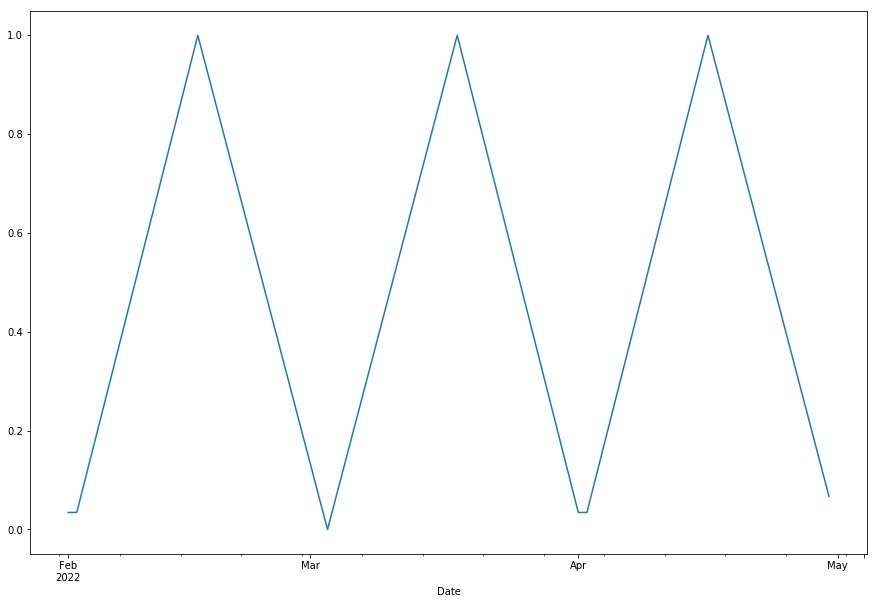

In [52]:
my_series.plot()
plt.show()

### Output results to CSV file

In [54]:
dm.to_csv('/Users/nicolaesse/Documents/Progetti/Analisi dei dati/002.Full Moon/02.Results/Lunar_phases.csv', sep='\t', encoding='utf-8')